In [131]:
import numpy as np
import configparser
import matplotlib.pyplot as plt
import io
from scipy import ndimage


#from google.colab import files
#uploaded = files.upload()

In [132]:
#raw_channel = np.load(io.BytesIO(uploaded['raw_cortex.npy']))
#anno_channel = np.load(io.BytesIO(uploaded['anno_cortex.npy']))
raw_channel = np.load("/Users/kevindruciak/PycharmProjects/intersession2020/cell_detect/raw_cortex.npy")
anno_channel = np.load("/Users/kevindruciak/PycharmProjects/intersession2020/cell_detect/anno_cortex.npy")
print(raw_channel.shape)
print(anno_channel.shape)

(300, 300, 300)
(300, 300, 300)


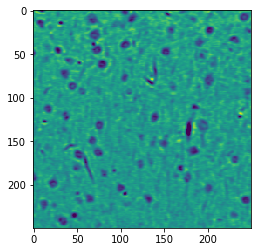

In [133]:
# Divide the data into training, test (don't change this!)
x_train = raw_channel[0:250,0:250,0:100]
x_test = raw_channel[0:250,0:250,100:150]
y_train = anno_channel[0:250,0:250,0:100]
#Cell bodies are indicated with the annotation 2, convert this so y_train=1 is a cell and y_train=0 is not a cell
y_train[y_train>2]=0
y_train[y_train<2]=0
y_train[y_train==2]=1

#Cell bodies are indicated with the annotation 2, convert this so y_test=1 is a cell and y_test=0 is not a cell
y_test = anno_channel[0:250,0:250,100:150]
y_test[y_test>2]=0
y_test[y_test<2]=0
y_test[y_test==2]=1
#display images
plt.imshow(np.squeeze(x_train[:,:,50]))

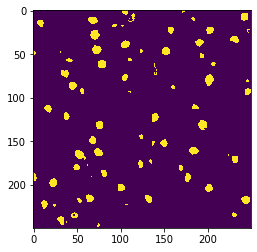

In [134]:
#show labels
plt.imshow(np.squeeze(y_train[:,:,50]))

In [135]:
#YOUR CODE HERE
#Print sizes of xtrain, ytrain, xtest, ytest
#Find maximum and minumum values of xtrain, ytrain, xtest, ytest
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
#Find maximum and minumum values of xtrain, ytrain, xtest, ytest
print(np.max(x_train))
print(np.min(x_train))
print(np.max(y_train))
print(np.min(y_train))
print(np.max(x_test))
print(np.min(x_test))
print(np.max(y_test))
print(np.min(y_test))

(250, 250, 100)
(250, 250, 100)
(250, 250, 50)
(250, 250, 50)
255
0
1
0
255
0
1
0


In [136]:
max_threshold = 0

In [137]:
#find a good threshold
def classifier(train, t, f):
    global max_threshold
    flast = f
    yhat = np.zeros((250, 250, 100))
    for d in range(100):
        yhat[:,:,d] = good_detector(train, d, t)
    f2 = f1_score(y_train,yhat,threshold=0.5)
    if f2 >= flast:
        t += 1
        if t > max_threshold:
            max_threshold = t
        classifier(train, t, f2)

In [138]:
 
#finds y_hat for x_test
def get_yhat():    
    classifier(x_train, 70, 0)
    yhat = np.zeros((250, 250, 50))
    
    for d in range(50):
        yhat[:,:,d] = good_detector(x_test, d, max_threshold)
    return yhat

In [139]:
#creates a binary image between thresholds
def good_detector(x_data, index, t):
    data = x_data[:,:,index]
    binary_img = (data < t) & (data > 15)
    return binary_img

In [140]:
#prints data
def print_result(d, index):
    data = d[:,:,index]
    plt.figure(figsize=(11,4))
    plt.subplot(131)
    plt.imshow(data)

In [141]:
def f1_score(y_true,y_hat,threshold=0.5):
  y_true[y_true>threshold] = 1
  y_true[y_true<threshold] = 0
  y_hat[y_hat>threshold] = 1
  y_hat[y_hat<threshold] = 0
  
  #https://en.wikipedia.org/wiki/F1_score
  y_and = np.add(y_true,y_hat)
  true_detections = len(np.where(y_and>1)[0])#add the two numbers together, if both are true it will be 2
  detect_positives = len(np.where(y_hat>0)[0]) #positive numbers indicate detections
  true_positives = len(np.where(y_true>0)[0]) #posiive numbers indicate true cells
  if detect_positives == 0:
      return 0
  precision = true_detections/detect_positives
  recall = true_detections/true_positives
  f1 = 2*precision*recall/(precision+recall)
  return f1

0.8036742812515254


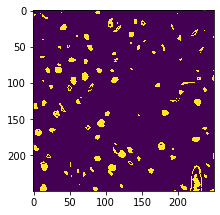

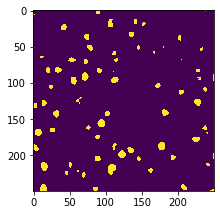

In [142]:
#driver
y_hat = get_yhat()
#f1 score
print(f1_score(y_test, y_hat, threshold=.5))
#y_hat data
print_result(y_hat, 20)
#y_test data
print_result(y_test, 20)